In [11]:
from random import random
from math import log
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 7)})

In [2]:
def growth_Hs(Hs, Hd, P):
    return Hs+1, Hd, P

def growth_Hd(Hs, Hd, P):
    return Hs, Hd+1, P

def death_Hs(Hs, Hd, P):
    return Hs-1, Hd, P

def death_Hd(Hs, Hd, P):
    return Hs, Hd-1, P

def death_P(Hs, Hd, P):
    return Hs, Hd, P-1

def attack_Hs(Hs, Hd, P):
    return Hs-1, Hd, P+1

def attack_Hd(Hs, Hd, P):
    return Hs, Hd-1, P+1

events = [growth_Hs, growth_Hd, death_Hs, death_Hd, death_P, attack_Hs, attack_Hd]

def execute_event(*args, rates):
    prob = rates / sum(rates)
    return np.random.choice(events, p=prob)(*args)

In [3]:
# functional response 
alpha = 0.5
gamma = 0.001
s_sd = 1.0
s_ds = 0.3

def Phi_s(Hs, Hd):
    return alpha*Hs * (Hs + s_ds*Hd) / (Hs+Hd)

def Phi_d(Hs, Hd):
    return alpha*Hd * (s_sd*Hs + Hd) / (Hs+Hd)

In [4]:
# parameters
r = 3.0
delta = 0.1
epsilon_d = 0.2
epsilon_s = 0.3
C = 100.0

# initial value
Hs, Hd, P = 10, 10, 1
t = 0.0
# storage
y = [[t, Hs, Hd, P]]

while t < 1:
    # rates of each event occuring 
    
    rates = np.array([r*Hs*(1.0-(Hs+Hd)/C), 
                      r*Hd*(1.0-(Hs+Hd)/C), 
                      delta*Hs, 
                      delta*Hd, 
                      delta*P, 
                      epsilon_s*Phi_s(Hs, Hd)*P, 
                      epsilon_d*Phi_d(Hs, Hd)*P])
    Hs, Hd, P = execute_event(Hs, Hd, P, rates=rates)
    dt = -log(random())/sum(rates)
    t = t + dt
    y.append([t, Hs, Hd, P])

# convert to 2D numpy array
y = np.array(y)

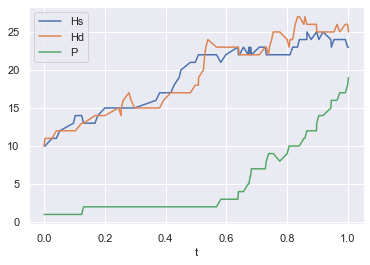

In [5]:
plt.plot(y[:,0], y[:,1:])
plt.xlabel('t')
plt.legend(['Hs', 'Hd', 'P'])
plt.show()

In [6]:
def gillespie(Hs0, Hd0, P0):
    # initial condition
    Hs, Hd, P = Hs0, Hd0, P0
    t = 0.0
    while t < 1.0:
        rates = np.array([r*Hs*(1.0-(Hs+Hd)/C), 
                          r*Hd*(1.0-(Hs+Hd)/C), 
                          delta*Hs, 
                          delta*Hd, 
                          delta*P, 
                          epsilon_s*Phi_s(Hs, Hd)*P, 
                          epsilon_d*Phi_d(Hs, Hd)*P])
        Hs, Hd, P = execute_event(Hs, Hd, P, rates=rates)
        dt = -log(random())/sum(rates)
        t = t + dt
    return Hs, Hd, P

In [9]:
n = 1000
y = np.zeros((n,3))
for i in range(n):
    y[i,:] = gillespie(5, 10, 1)

df = pd.DataFrame(y)
df.columns = ['Hs', 'Hd', 'P']
df.describe()

,Hs,Hd,P
count,1000.00000,1000.000000,1000.000000
mean,17.24300,33.091000,25.124000
std,7.39653,12.539057,16.544798
min,0.00000,4.000000,0.000000
25%,12.00000,24.000000,11.750000
50%,17.00000,33.000000,23.000000
75%,22.00000,42.000000,36.250000
max,49.00000,67.000000,79.000000


/home/kenny/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kenny/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kenny/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

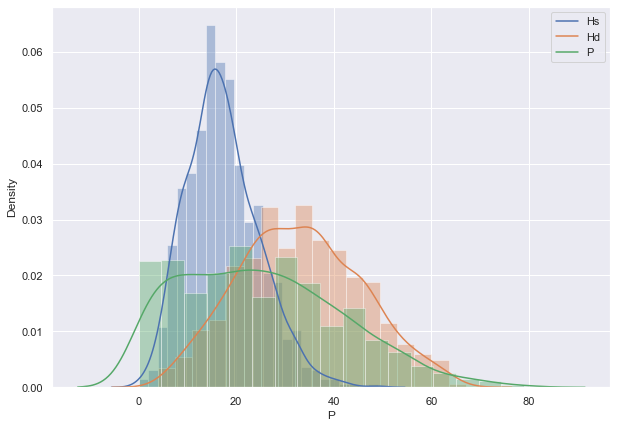

In [12]:
sns.distplot(df['Hs'])
sns.distplot(df['Hd'])
sns.distplot(df['P'])
plt.legend(labels=["Hs", "Hd", "P"])
plt.show()